# Part 3: Feature Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv')
df = df. drop('Unnamed: 0', axis=1)
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_aids,stds_hiv,stds_hepatitis_b,stds_hpv,stds_number_of_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [3]:
features = df.columns.to_list()

## Split Input and Traget Variables

In [4]:
X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

In [5]:
X.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds', 'stds_(number)', 'stds_condylomatosis',
       'stds_cervical_condylomatosis', 'stds_vaginal_condylomatosis',
       'stds_vulvo-perineal_condylomatosis', 'stds_syphilis',
       'stds_pelvic_inflammatory_disease', 'stds_genital_herpes',
       'stds_molluscum_contagiosum', 'stds_aids', 'stds_hiv',
       'stds_hepatitis_b', 'stds_hpv', 'stds_number_of_diagnosis', 'dx_cancer',
       'dx_cin', 'dx_hpv', 'dx'],
      dtype='object')

## Train Test Split

In [6]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (858, 31)
Shape of training dataset: (566, 30)
Shape of testing dataset: (292, 30)


## Defining all the functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []):
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:
def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))
    
    print ('.')

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", round(rec_mac, 4))

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", round(rec_wei, 4))

#### Writing a function returns Macro and Weighted average of Recall Score, Precision, and F1 Score

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score:", acc) 

#### ROC_AUC, Precision Recall AUC and the Confusion Matrices

In [10]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

## (a) Feature selection using SelectFromModel and LassoCV

In [11]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv')
df = df. drop('Unnamed: 0', axis=1)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

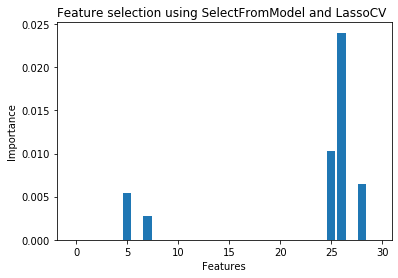

Selected features: ['dx_cancer' 'stds_number_of_diagnosis' 'dx_hpv' 'smokes_(years)'
 'hormonal_contraceptives' 'age' 'dx_cin' 'stds_hpv' 'stds_hepatitis_b'
 'stds_hiv' 'stds_aids' 'stds_molluscum_contagiosum' 'stds_genital_herpes'
 'stds_pelvic_inflammatory_disease' 'stds_syphilis']


In [12]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

clf = LassoCV(random_state=42).fit(X_train, y_train)
importance = np.abs(clf.coef_)

idx_features = (-importance).argsort()[:15]
name_features = np.array(X.columns.to_list())[idx_features]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Feature selection using SelectFromModel and LassoCV ")
plt.show()

print('Selected features: {}'.format(name_features))

In [13]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols =['dx_cancer', 'stds_number_of_diagnosis', 'dx_hpv', 'smokes_(years)',
 'hormonal_contraceptives', 'age', 'dx_cin', 'stds_hpv', 'stds_hepatitis_b',
 'stds_hiv', 'stds_aids', 'stds_molluscum_contagiosum', 'stds_genital_herpes',
 'stds_pelvic_inflammatory_disease', 'stds_syphilis', 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.398997,0.01987,0.285714,0.014184,0.188552,0.027027,0.506849


---------------------------------------------------------------


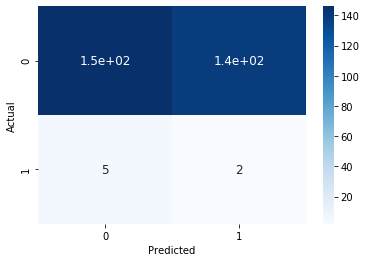

TP: 2, FP: 139, TN: 146, FN: 5
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.512     0.670       285
           1      0.014     0.286     0.027         7

    accuracy                          0.507       292
   macro avg      0.491     0.399     0.348       292
weighted avg      0.944     0.507     0.654       292

---------------------------------------------------------------
Recall Score: 0.2857
.
Macro Average of Recall Score: 0.399
Weighted Average of Recall Score: 0.5068
---------------------------------------------------------------


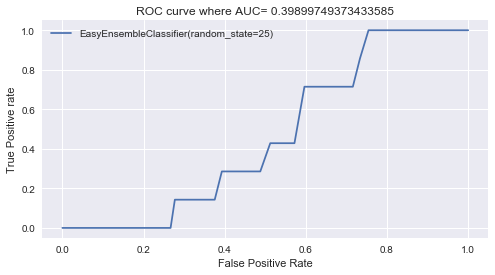

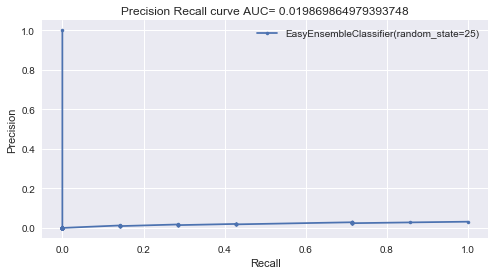

In [15]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## (b) Feature Selection: RandomForest Recursive Feature Elimination

In [16]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### sklearn.feature_selection.RFE

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, criterion='entropy', max_depth=20, max_features='auto')

from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=15, step = 1)

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)

print('-----------------------------------------------------------------------')

print("Selected Features: %s" % fit.support_)

print('-----------------------------------------------------------------------')

print("Feature Ranking: %s" % fit.ranking_)

Num Features: 15
-----------------------------------------------------------------------
Selected Features: [ True  True  True  True False  True  True  True  True  True  True False
  True False False False  True False False False False False False False
 False  True  True False  True False]
-----------------------------------------------------------------------
Feature Ranking: [ 1  1  1  1  4  1  1  1  1  1  1  3  1  5 12  9  1  6 13 11 14 15  2  8
 16  1  1 10  1  7]


In [18]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})

selected_rfe_features.sort_values(by='Ranking')
selected_rfe_features = selected_rfe_features[selected_rfe_features['Ranking'] == 1]
top15 = selected_rfe_features.nlargest(15,'Ranking')
top15

,Feature,Ranking
0,age,1
1,number_of_sexual_partners,1
2,first_sexual_intercourse,1
3,num_of_pregnancies,1
5,smokes_(years),1
6,smokes_(packs_year),1
7,hormonal_contraceptives,1
8,hormonal_contraceptives_(years),1
9,iud,1
10,iud_(years),1


In [19]:
top15.Feature.values

array(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)',
       'iud', 'iud_(years)', 'stds_(number)',
       'stds_vulvo-perineal_condylomatosis', 'stds_number_of_diagnosis',
       'dx_cancer', 'dx_hpv'], dtype=object)

In [20]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = ['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)',
       'iud', 'iud_(years)', 'stds_(number)',
       'stds_vulvo-perineal_condylomatosis', 'stds_number_of_diagnosis',
       'dx_cancer', 'dx_hpv', 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.730326,0.034708,0.857143,0.05042,0.216216,0.095238,0.609589


---------------------------------------------------------------


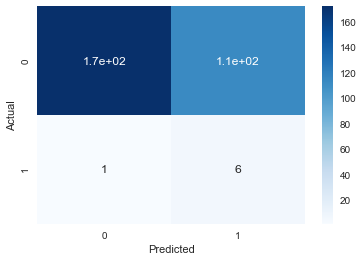

TP: 6, FP: 113, TN: 172, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.604     0.751       285
           1      0.050     0.857     0.095         7

    accuracy                          0.610       292
   macro avg      0.522     0.730     0.423       292
weighted avg      0.972     0.610     0.735       292

---------------------------------------------------------------
Recall Score: 0.8571
.
Macro Average of Recall Score: 0.7303
Weighted Average of Recall Score: 0.6096
---------------------------------------------------------------


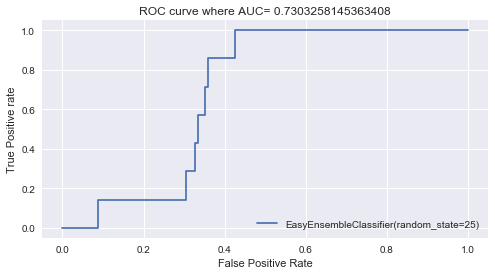

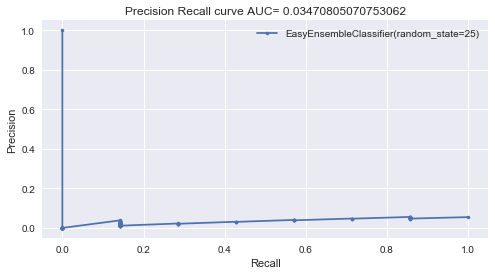

In [22]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## (c) Feature Selection: RandomForest Boruta

In [23]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)
rf.fit(X_train, y_train)

from boruta import BorutaPy
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	29
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x2154136DD08),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2154136DD08, verbose=2)

In [25]:
# check selected features
print("Selected Features: ", boruta_selector.support_)

print ('----------------------------------------------------------------------------')
 
# check ranking of features
print("Ranking: ", boruta_selector.ranking_)

print ('----------------------------------------------------------------------------')

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
----------------------------------------------------------------------------
Ranking:  [ 3  5  4  6 27 10 13 11  2 14  6 16 12 17 27 20 18 18 22 23 27 30 15 24
 27 21  9 31  8 25]
----------------------------------------------------------------------------
No. of significant features:  0


In [26]:
green_area = X.columns[boruta_selector.support_].to_list()
blue_area = X.columns[boruta_selector.support_weak_].to_list()

print ('features in the green area:', green_area)

print ('============================================================================================================================================================================================================')

print ('features in the blue area:', blue_area)

features in the green area: []
features in the blue area: []


In [27]:
# Let's visualise it better in the form of a table
selected_boruta_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_boruta_features.sort_values(by='Ranking')
selected_boruta_features = selected_boruta_features[selected_boruta_features['Ranking'] < 16]
top15 = selected_boruta_features.nsmallest(15,'Ranking')
top15 

,Feature,Ranking
8,hormonal_contraceptives_(years),2
0,age,3
2,first_sexual_intercourse,4
1,number_of_sexual_partners,5
3,num_of_pregnancies,6
10,iud_(years),6
28,dx_hpv,8
26,dx_cancer,9
5,smokes_(years),10
7,hormonal_contraceptives,11


In [28]:
top15.Feature.values

array(['hormonal_contraceptives_(years)', 'age',
       'first_sexual_intercourse', 'number_of_sexual_partners',
       'num_of_pregnancies', 'iud_(years)', 'dx_hpv', 'dx_cancer',
       'smokes_(years)', 'hormonal_contraceptives', 'stds_(number)',
       'smokes_(packs_year)', 'iud', 'stds_hiv'], dtype=object)

In [29]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = ['hormonal_contraceptives_(years)', 'age',
       'first_sexual_intercourse', 'number_of_sexual_partners',
       'num_of_pregnancies', 'iud_(years)', 'dx_hpv', 'dx_cancer',
       'smokes_(years)', 'hormonal_contraceptives', 'stds_(number)',
       'smokes_(packs_year)', 'iud', 'stds_hiv', 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.726817,0.033103,0.857143,0.049587,0.214559,0.09375,0.60274


---------------------------------------------------------------


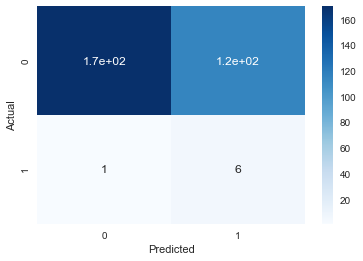

TP: 6, FP: 115, TN: 170, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.596     0.746       285
           1      0.050     0.857     0.094         7

    accuracy                          0.603       292
   macro avg      0.522     0.727     0.420       292
weighted avg      0.972     0.603     0.730       292

---------------------------------------------------------------
Recall Score: 0.8571
.
Macro Average of Recall Score: 0.7268
Weighted Average of Recall Score: 0.6027
---------------------------------------------------------------


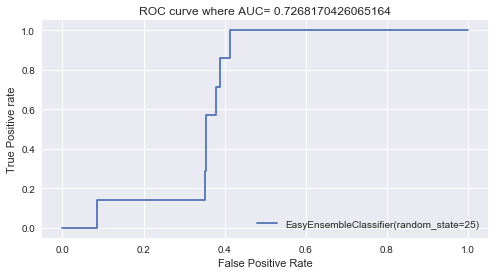

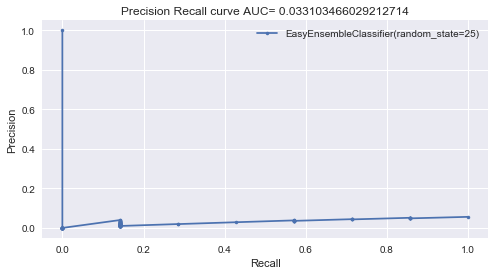

In [31]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## (d) Permutation Feature Importance

In [32]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

Feature: 0, Score: 0.41143
Feature: 1, Score: 0.30286
Feature: 2, Score: 0.35429
Feature: 3, Score: 0.34857
Feature: 4, Score: 0.06286
Feature: 5, Score: 0.13143
Feature: 6, Score: 0.16571
Feature: 7, Score: 0.18857
Feature: 8, Score: 0.42857
Feature: 9, Score: 0.15429
Feature: 10, Score: 0.17143
Feature: 11, Score: 0.03429
Feature: 12, Score: 0.09714
Feature: 13, Score: 0.06286
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00571
Feature: 16, Score: 0.05143
Feature: 17, Score: 0.00571
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.02857
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.05143
Feature: 26, Score: 0.11429
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.11429
Feature: 29, Score: 0.00000


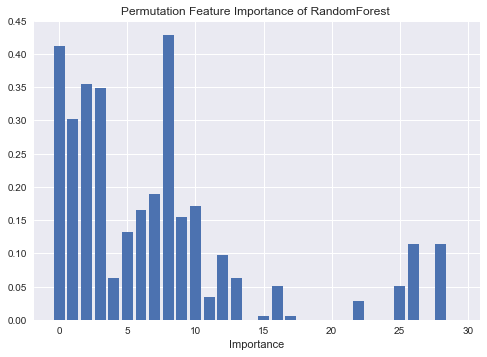

In [33]:
from sklearn.inspection import permutation_importance

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='recall')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.xlabel('Importance')
plt.title("Permutation Feature Importance of RandomForest ")
plt.show()

In [34]:
import warnings
warnings.filterwarnings('ignore')

idx_features = (-importance).argsort()[:15]
name_features = np.array(X_train.columns.to_list())[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['hormonal_contraceptives_(years)' 'age' 'first_sexual_intercourse'
 'num_of_pregnancies' 'number_of_sexual_partners'
 'hormonal_contraceptives' 'iud_(years)' 'smokes_(packs_year)' 'iud'
 'smokes_(years)' 'dx_cancer' 'dx_hpv' 'stds_(number)' 'smokes'
 'stds_condylomatosis']


In [35]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = ['hormonal_contraceptives_(years)', 'age', 'first_sexual_intercourse',
 'num_of_pregnancies', 'number_of_sexual_partners',
 'hormonal_contraceptives', 'iud_(years)', 'iud', 'smokes_(packs_year)',
 'smokes_(years)', 'dx_cancer', 'dx_hpv', 'stds_(number)', 'smokes',
 'stds_number_of_diagnosis' , 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.728571,0.034297,0.857143,0.05,0.21374,0.094488,0.606164


---------------------------------------------------------------


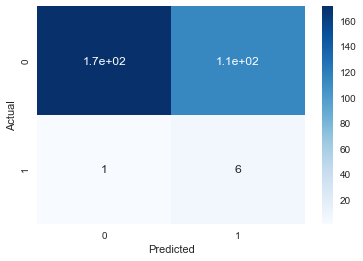

TP: 6, FP: 114, TN: 171, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.600     0.748       285
           1      0.050     0.857     0.094         7

    accuracy                          0.606       292
   macro avg      0.522     0.729     0.421       292
weighted avg      0.972     0.606     0.733       292

---------------------------------------------------------------
Recall Score: 0.8571
.
Macro Average of Recall Score: 0.7286
Weighted Average of Recall Score: 0.6062
---------------------------------------------------------------


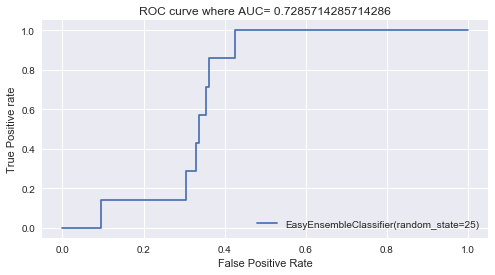

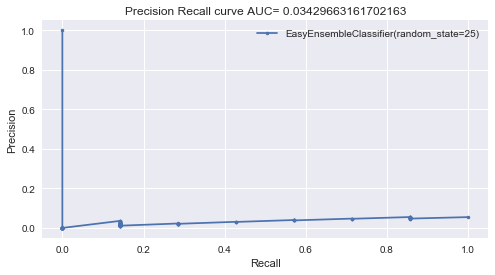

In [37]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## (e) Feature Importance using RandomForestClassifier

In [38]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv')
df = df. drop('Unnamed: 0', axis=1)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

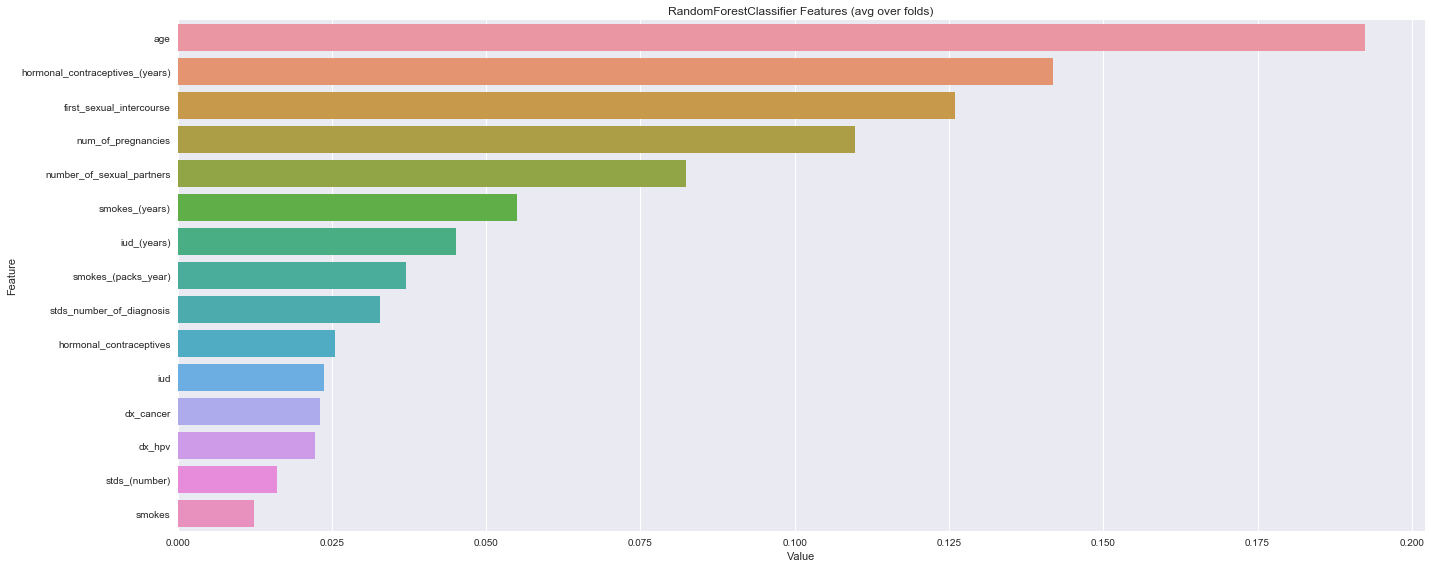

In [39]:
model = RandomForestClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('RandomForestClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [40]:
rf_features = top15.Feature.to_list()
rf_features

['age',
 'hormonal_contraceptives_(years)',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'number_of_sexual_partners',
 'smokes_(years)',
 'iud_(years)',
 'smokes_(packs_year)',
 'stds_number_of_diagnosis',
 'hormonal_contraceptives',
 'iud',
 'dx_cancer',
 'dx_hpv',
 'stds_(number)',
 'smokes']

In [41]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = ['age',
 'hormonal_contraceptives_(years)',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'number_of_sexual_partners',
 'smokes_(years)',
 'iud_(years)',
 'smokes_(packs_year)',
 'stds_number_of_diagnosis',
 'hormonal_contraceptives',
 'iud',
 'dx_cancer',
 'dx_hpv',
 'stds_(number)',
 'smokes', 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.728571,0.034297,0.857143,0.05,0.21374,0.094488,0.606164


---------------------------------------------------------------


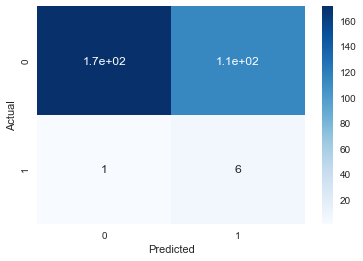

TP: 6, FP: 114, TN: 171, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.600     0.748       285
           1      0.050     0.857     0.094         7

    accuracy                          0.606       292
   macro avg      0.522     0.729     0.421       292
weighted avg      0.972     0.606     0.733       292

---------------------------------------------------------------
Recall Score: 0.8571
.
Macro Average of Recall Score: 0.7286
Weighted Average of Recall Score: 0.6062
---------------------------------------------------------------


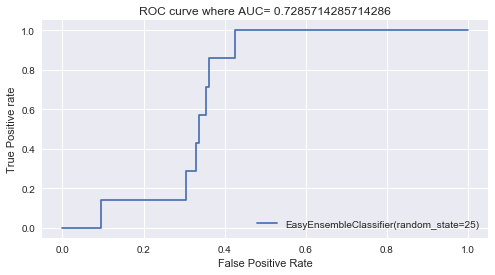

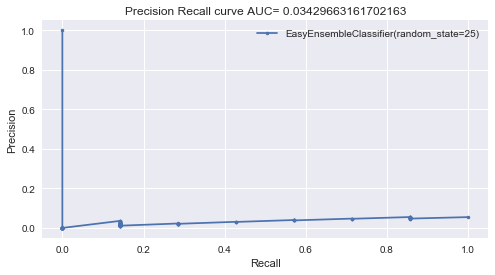

In [43]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## (f) Feature Importance using XGBoostClassifier

In [44]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv')
df = df. drop('Unnamed: 0', axis=1)

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

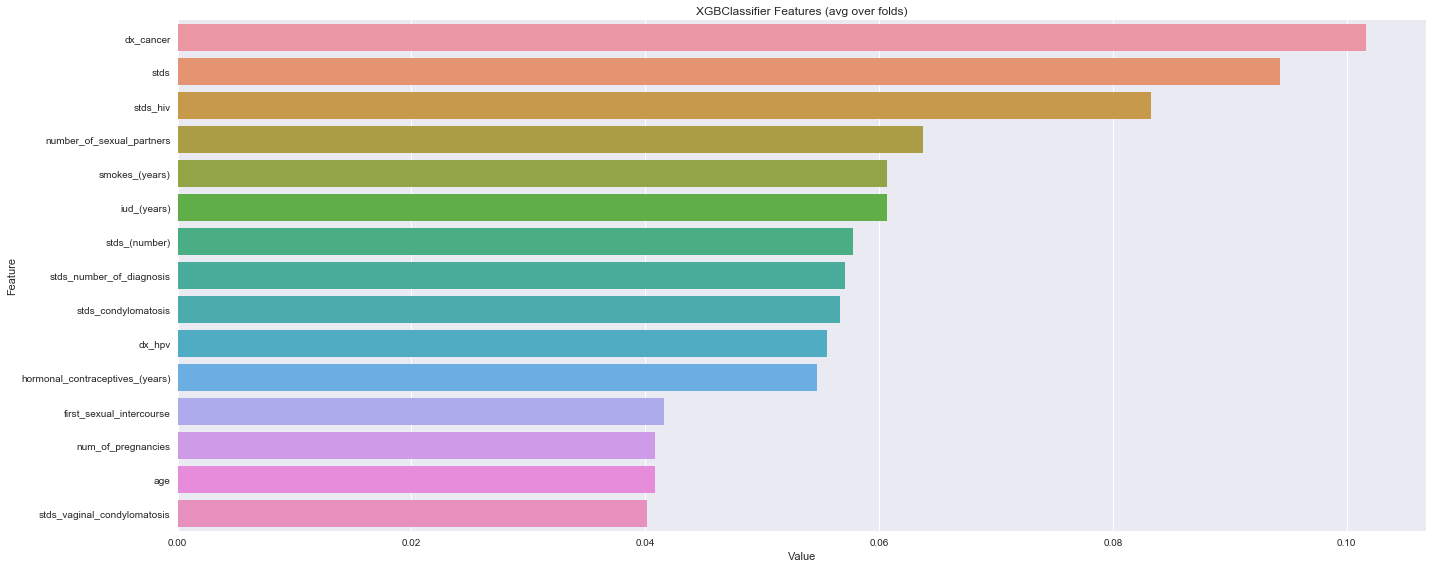

In [45]:
model = XGBClassifier(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True), columns=['Value','Feature'])
feature_imp

top15 = feature_imp.nlargest(15,'Value')

plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=top15.sort_values(by="Value", ascending=False))
plt.title('XGBClassifier Features (avg over folds)')
plt.tight_layout()
plt.show()

In [46]:
xgb_features = top15.Feature.to_list()
xgb_features

['dx_cancer',
 'stds',
 'stds_hiv',
 'number_of_sexual_partners',
 'smokes_(years)',
 'iud_(years)',
 'stds_(number)',
 'stds_number_of_diagnosis',
 'stds_condylomatosis',
 'dx_hpv',
 'hormonal_contraceptives_(years)',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'age',
 'stds_vaginal_condylomatosis']

In [47]:
df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = ['dx_cancer',
 'stds',
 'stds_hiv',
 'number_of_sexual_partners',
 'smokes_(years)',
 'iud_(years)',
 'stds_(number)',
 'stds_number_of_diagnosis',
 'stds_condylomatosis',
 'dx_hpv',
 'hormonal_contraceptives_(years)',
 'first_sexual_intercourse',
 'num_of_pregnancies',
 'age',
 'stds_vaginal_condylomatosis', 'hinselmann'])

X = df.drop('hinselmann', axis = 1) 
y = df['hinselmann']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
models = [EasyEnsembleClassifier(random_state=25)]
model_names=['EasyClassifier']
model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,EasyClassifier,0.725063,0.031558,0.857143,0.04918,0.211321,0.093023,0.599315


---------------------------------------------------------------


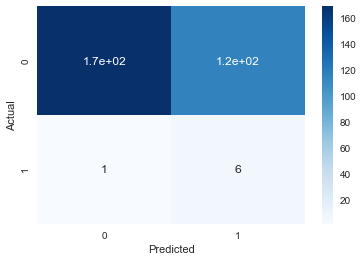

TP: 6, FP: 116, TN: 169, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.994     0.593     0.743       285
           1      0.049     0.857     0.093         7

    accuracy                          0.599       292
   macro avg      0.522     0.725     0.418       292
weighted avg      0.971     0.599     0.727       292

---------------------------------------------------------------
Recall Score: 0.8571
.
Macro Average of Recall Score: 0.7251
Weighted Average of Recall Score: 0.5993
---------------------------------------------------------------


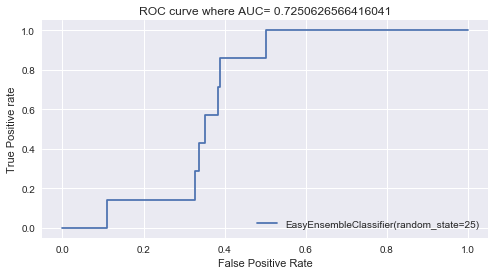

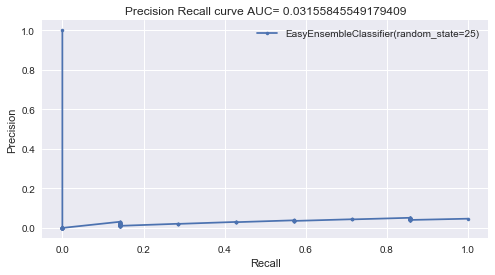

In [49]:
models = [EasyEnsembleClassifier(random_state=25)]
roc_pr_cm(models)

## Conclusion

### Selected Features: (b) RandomForest Recursive Feature Elimination

- Recall Score: 0.8571
- Macro Average of Recall Score: 0.7303
- Weighted Average of Recall Score: 0.6096


['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)',
       'iud', 'iud_(years)', 'stds_(number)',
       'stds_vulvo-perineal_condylomatosis', 'stds_number_of_diagnosis',
       'dx_cancer', 'dx_hpv', 'hinselmann']